In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
CHI_2018 = pd.read_csv("data/chicago_2018.csv")
CHI_2018.set_index(pd.DatetimeIndex(CHI_2018["start_time"]),inplace=True)
CHI_2018.drop("start_time", axis=1, inplace=True)

In [15]:
CHI_2018.columns.to_list()

['end_time',
 'start_station_id',
 'end_station_id',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type']

In [36]:
CHI_2018.reset_index(inplace=True)
def to_day(ts):
    return ts.date()
CHI_2018["start_day"] = CHI_2018["start_time"].apply(to_day)
CHI_2018["start_hour"] = CHI_2018["start_time"].apply(lambda ts: ts.hour)

In [37]:
CHI_2018.head()

,index,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_day,start_hour
0,0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,2018-04-01,0
1,1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,2018-04-01,0
2,2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,2018-04-01,0
3,3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,2018-04-01,0
4,4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,2018-04-01,0


In [34]:
SUBS = CHI_2018[CHI_2018["user_type"] == "Subscriber"].groupby("start_day")["user_type"].count() # [CHI_2018["user_type"] == "Subscriber"]
SUBS = SUBS / CHI_2018.groupby("start_day")["user_type"].count()
# plt.plot()
SUBS.head()

start_day
2018-01-01    0.952128
2018-01-02    0.997557
2018-01-03    0.987966
2018-01-04    0.989238
2018-01-05    0.986086
Name: user_type, dtype: float64

<AxesSubplot:xlabel='start_day'>

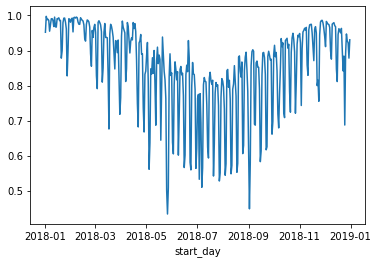

In [35]:
SUBS.plot()

In [39]:
SUBS_HOURLY = CHI_2018[CHI_2018["user_type"] == "Subscriber"].groupby("start_hour")["user_type"].count() # [CHI_2018["user_type"] == "Subscriber"]
SUBS_HOURLY = SUBS_HOURLY / CHI_2018.groupby("start_hour")["user_type"].count()
# plt.plot()
SUBS_HOURLY.head()

start_hour
0    0.741663
1    0.728250
2    0.717220
3    0.742196
4    0.874496
Name: user_type, dtype: float64

<AxesSubplot:xlabel='start_hour'>

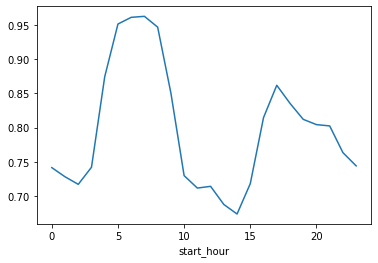

In [40]:
SUBS_HOURLY.plot()

In [45]:
DEMAND_DAY = CHI_2018.groupby("start_day")["start_day"].count()

<AxesSubplot:xlabel='start_day'>

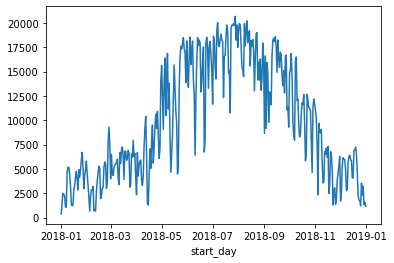

In [46]:
DEMAND_DAY.plot()

In [47]:
DEMAND_HOUR = CHI_2018.groupby("start_hour")["start_hour"].count()

<AxesSubplot:xlabel='start_hour'>

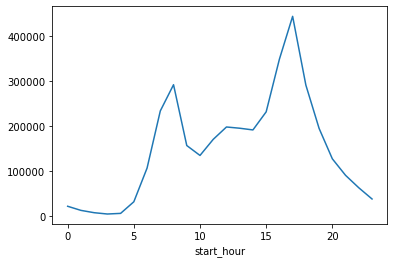

In [48]:
DEMAND_HOUR.plot()